# Dataset splits

In [1]:
%reload_ext autoreload

%autoreload 2

import math
import os

import iris
import iris.analysis.cartography
import matplotlib
import matplotlib.pyplot as plt
import xarray as xr

import ml_downscaling_emulator as mlde
from ml_downscaling_emulator.utils import cp_model_rotated_pole, platecarree, plot_grid

In [15]:
def open_split(dataset_name, split):
    return xr.open_dataset(os.path.join(os.getenv("MOOSE_DERIVED_DATA"), "nc-datasets", dataset_name, f"{split}.nc"))

## Vorticity@850 GCM-scaled and Target precip

In [17]:
vort_gcm_scale_splits = {split: open_split("2.2km-coarsened-gcm-2.2km_london_vorticity850_random", split) for split in ["train", "val", "test"]}

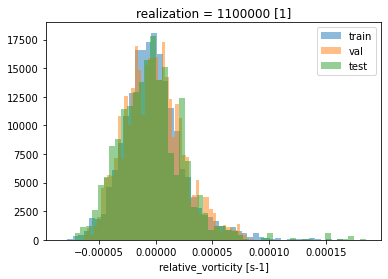

In [21]:
ax = plt.axes()
for split in ["train", "val", "test"]: 
    vort_gcm_scale_splits[split]["vorticity850"].plot.hist(ax=ax, bins=50, density=True, alpha=0.5, label=split)

ax.legend()

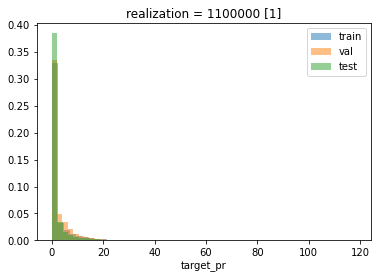

In [23]:
ax = plt.axes()
for split in ["train", "val", "test"]: 
    (vort_gcm_scale_splits[split]["target_pr"]*3600*24).plot.hist(bins=50, density=True, alpha=0.5, label=split)
ax.legend()